# Using  machine learning algorithms to explore a data set and predict the type of breast cancer someone has:

By Atwine Mugume Twinamatsiko.

### Motivation:

Breast cancer is one of the leading cancers that cause death in women. In this study, I want to deploy machine learning algorithm to see if the diagnosis of breast cancer can be predicted based on some initial variables.


The data used in this analysis is from UCI library of machine learning

https://archive.ics.uci.edu/ml/datasets.html?format=&task=cla&att=num&area=life&numAtt=&numIns=&type=mvar&sort=nameUp&view=table

## Objective: 
>### To test to what percentage can predictive analysis of breast cancer tumor data aid in correct diagnosis

#### Honor Society of Nursing (STTI)
##### Administration
>"Breast cancer is a serious disease. Although some types of breast cancer are curable - especially in the early stages - treatment can be long and difficult. Some breast cancers are less curable, especially once they spread to other body parts. About 20 percent of breast cancer patients die of the disease."

#### Stuart A. Linder, MD
##### Plastic Surgery
>>"Breast cancer can be serious; however, the majority of cases are curable if diagnosed early on.  Statistics indicate 20% of patients who have breast cancer will succumb from their disease.  Approximately 1 out of 8 women will develop a form of breast cancer and, therefore, diagnostic screening, including mammogram, ultrasounds, MRIs, and biopsies of palpable nodes, nodules, or masses should be performed."

>Prospective identification of tumorigenic breast cancer cells
Muhammad Al-Hajj, Max S. Wicha, Adalberto Benito-Hernandez, Sean J. Morrison, and Michael F. Clarke
PNAS April 1, 2003. 100 (7) 3983-3988; https://doi.org/10.1073/pnas.0530291100
Communicated by Jack E. Dixon, University of Michigan Medical School, Ann Arbor, MI (received for review December 18, 2002)


>>Abstract
Breast cancer is the most common malignancy in United States women, accounting for >40,000 deaths each year. These breast tumors are comprised of phenotypically diverse populations of breast cancer cells. Using a model in which human breast cancer cells were grown in immunocompromised mice, we found that only a minority of breast cancer cells had the ability to form new tumors. We were able to distinguish the tumorigenic (tumor initiating) from the nontumorigenic cancer cells based on cell surface marker expression.

#### At this stage we are  have these objectives:
* Ingest the data
* Check for missing values and deal with them
* Explore the data with descriptive statistics to see the shape of the data we are dealing with

In [66]:
#Importing the necessary modules
%matplotlib inline
import matplotlib.pyplot as plt

#Load libraries for data processing
import pandas as pd #data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
from scipy.stats import norm
import seaborn as sns # visualization


plt.rcParams['figure.figsize'] = (15,8) 
plt.rcParams['axes.titlesize'] = 'large'

Now after calling the required libraries in python, let us igest the data from our local location

In [67]:

data = pd.read_csv('./breastCancer.csv')

Lest take at the top ten rows in our data

In [68]:
data.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [69]:
#let us see how big our data is by finding its total features and variables
np.shape(data)

(569, 32)

Our data has 569 rows and 32 variables that we have to interact with

In [70]:
#lets get some more information about the data contained in the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

From the cell above we can see that the data is majorly float type and we have no null values.
However to be sure let us check.

In [71]:
#let us check for the null variables if there are any at all.
data.isnull().any().sum()

0

In [72]:
#to see some of the descriptive stats we can call the describe function on the dataframe
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [73]:
#we can also look at how skewed the data is, with a positive value meaning the variable is skewed tot he right while 
#negative means its is skewed to the left
data.skew()

id                         6.473752
radius_mean                0.942380
texture_mean               0.650450
perimeter_mean             0.990650
area_mean                  1.645732
smoothness_mean            0.456324
compactness_mean           1.190123
concavity_mean             1.401180
concave points_mean        1.171180
symmetry_mean              0.725609
fractal_dimension_mean     1.304489
radius_se                  3.088612
texture_se                 1.646444
perimeter_se               3.443615
area_se                    5.447186
smoothness_se              2.314450
compactness_se             1.902221
concavity_se               5.110463
concave points_se          1.444678
symmetry_se                2.195133
fractal_dimension_se       3.923969
radius_worst               1.103115
texture_worst              0.498321
perimeter_worst            1.128164
area_worst                 1.859373
smoothness_worst           0.415426
compactness_worst          1.473555
concavity_worst            1

From the data in the previous cell we can see that most of the variables are skewed to the right.

The best way to notice such is through visualization such as below.

In [74]:
data.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [75]:
#there are some columns that are not so significant such as the id in this case we are dropping in.
new_data = data.drop('id', axis = 1)

In [76]:
#let us check the new data
new_data.head(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [77]:
#the features should have redused to 31 now.
new_data.shape

(569, 31)

/Volumes/BackUP/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


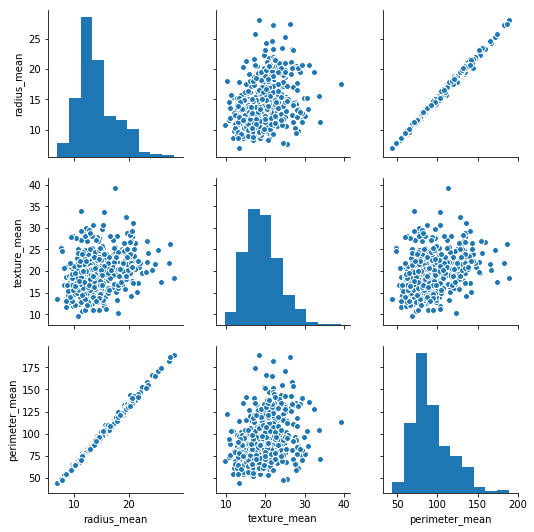

In [78]:
#let us plot a pairwise view of a few columns
slice_ = new_data.ix[:,1:4]
sns.pairplot(slice_)

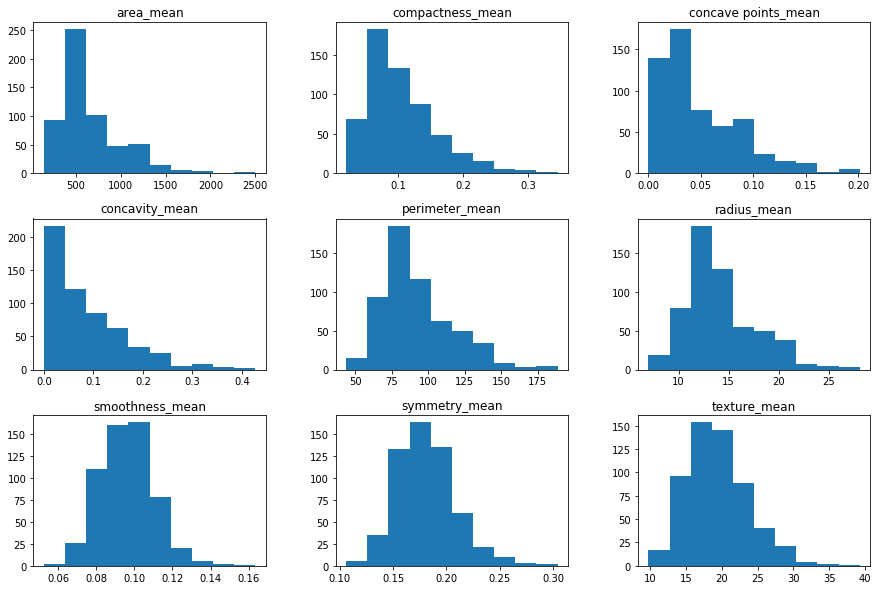

In [79]:
#To see specifically the distribution of the data we are going to sample 10 columns and visualize those to see the trend
slice_1 = new_data.ix[:,1:10]
hist = slice_1.hist(bins=10, figsize=(15, 10),grid=False)

The cell visualization above is a picture view of the function we run earlier (data.skew) we are able to see the distribution of the data, this helps us to decide if its necesarry to apply functions such as log to make the data into a bess shape for analysis or any other factors that may help later when we deploy the model

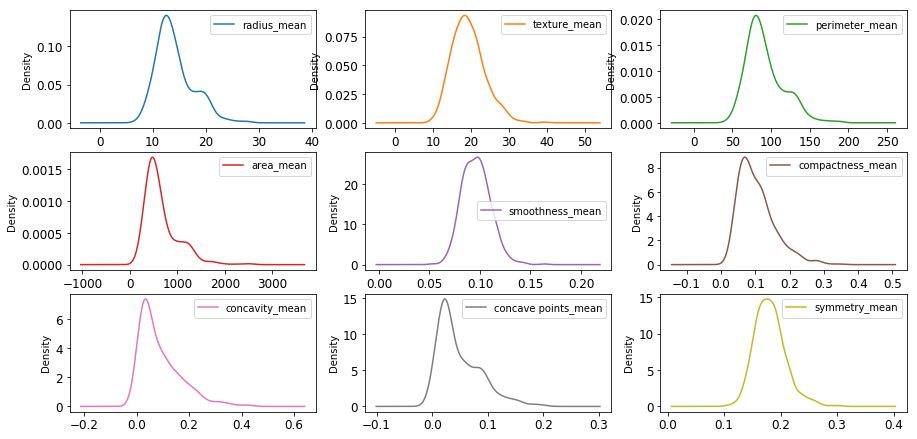

In [80]:
#we can also use density plots to look into the data and see how its distributed
plt = slice_1.plot(kind= 'density', subplots=True, layout=(4,3), sharex=False, 
                     sharey=False,fontsize=12, figsize=(15,10))

In [81]:
#we are slicing a piece of the full data set because the visualizations would be so many we have many columns
new_data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

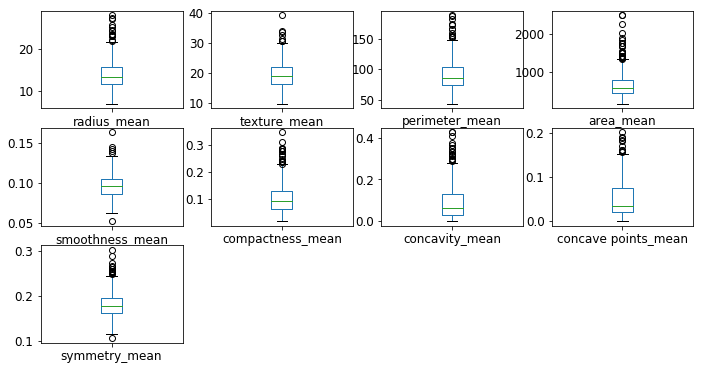

In [82]:
#one other way to see how the data looks like is to use boxplots, they help communicate, variance mean and also shows
#outliers in the data
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 11.7,8.27
box = slice_1.plot(kind= 'box' , subplots=True, layout=(4,4), sharex=False, sharey=False,fontsize=12)

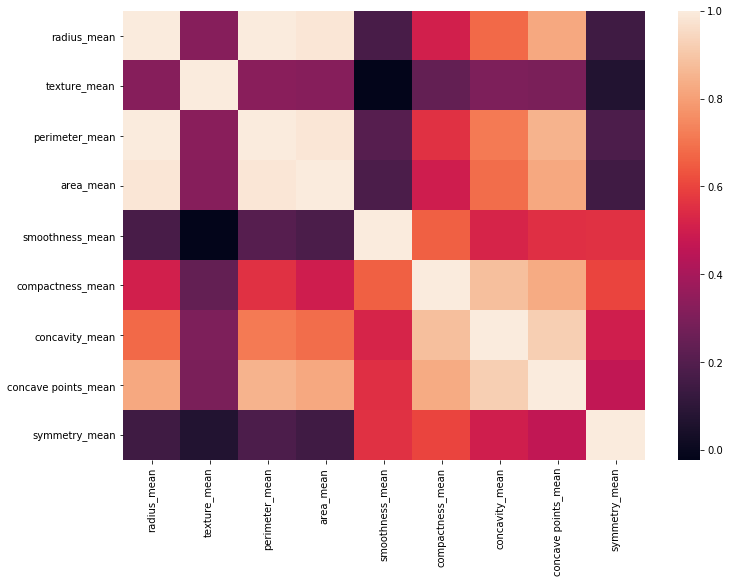

In [83]:
#in using PCA we will need to increase or reduce the dimensions based on the correlation of the variables and their variance.
sns.heatmap(slice_1.corr())

### Feature Selection:
> This stage is very crucial in a way that,choosing the wrong  features affects the results of the model that you would want to deploy. As a result we want to know some issues:

* what type of variables to we have (how many are categorical)
* if we had na values how would we deal with them
* How many dimensions are we going to deal with and which are best suited for this study
* Deploy the models we want to use for the study

In [84]:
#what variables do we have in our data
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se          569 n

From the values in the cell above we can see that we don't have many categorical variables, this tells us that we  have to creat dummies or convert to 0 and 1 values for the models to understand the diagnosis variable.

Let us now separate the variables into the features we want and the predition values

In [85]:
new_data.head(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [86]:
df = new_data.values
X = df[:,1:31] #these are the features we are going to use in the training and predictions
y = df[:,0] #these are the predicted values

In [87]:
#since y is categorical we need to encode the values with label encoders
y[:5]

array(['M', 'M', 'M', 'M', 'M'], dtype=object)

In [88]:
#transform the class labels from their original string representation (M and B) into integers
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [89]:
#now the values of y are 0 or 1
y[:5]

array([1, 1, 1, 1, 1])

## Feature interaction

> Feature interaction with how the features are related to one another, in terms of variance and correlation, at this level we would like to take on the features that are highly relatable and drop those that are not as related as we want in order to get a higher percentage on the score on predictability.

In [90]:
#lets split the data:
from sklearn.model_selection import train_test_split

##Split data set in train 75% and test 25%
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=7)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((426, 30), (426,), (143, 30), (143,))

In [91]:
from sklearn.preprocessing import StandardScaler

# Normalize the  data (center around 0 and scale to remove the variance).
scaler =StandardScaler()
Xs = pd.DataFrame(scaler.fit_transform(X))

/Volumes/BackUP/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [92]:
Xs.head(5)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


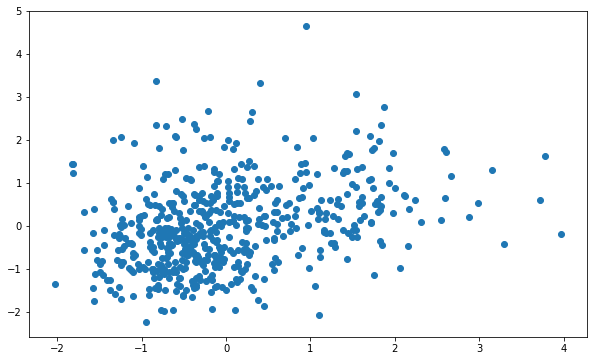

In [128]:
#we want to see how the points are distributed now below
# we will find a stardard distribution along what could be a normal gradient 
plt.figure(figsize = (10,6))
v = Xs.iloc[:,0]
u = Xs.iloc[:,1]
plt.scatter(v,u)

In [94]:
#since we have many features lets use the module for feature selection in sklearn to do our selection
import sklearn.feature_selection as skf

select = skf.SelectKBest(k=20)
selected_features = select.fit(X_train, y_train)
indices_selected = selected_features.get_support(indices=True)
colnames_selected = [Xs.columns[i] for i in indices_selected]

X_train_selected = X_train[colnames_selected]
X_test_selected = X_test[colnames_selected]

In [95]:
X_train_selected.shape, X_test_selected.shape

((20, 30), (20, 30))

In [96]:
print(colnames_selected)

[0, 1, 2, 3, 5, 6, 7, 10, 12, 13, 17, 20, 21, 22, 23, 24, 25, 26, 27, 28]


In [97]:
# Function to build model and find model performance
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

def performance(X_train, y_train, X_test, y_test):
    model = LogisticRegression()
    model.fit(X_train, y_train)
    y_hat = [x[1] for x in model.predict_proba(X_test)]
    auc = roc_auc_score(y_test, y_hat)
    
    return auc

In [98]:
y_train.shape, y_test.shape

((426,), (143,))

In [100]:
# # Find performance of model using preprocessed data
# auc_processed = find_model_perf(X_train_selected, y_train, X_test_selected, y_test)
# print(auc_processed)

In [109]:
 #Create an SVM classifier and train it on 70% of the data set.
from sklearn.svm import SVC
clf = SVC(probability=True)
clf.fit(X_train, y_train)

#Analyze accuracy of predictions on 30% of the holdout test sample.
classifier_score = clf.score(X_test, y_test)
print ('\nThe classifier accuracy score is {:03.2f}\n'.format(classifier_score))


The classifier accuracy score is 0.69



In [110]:
#the accuracy score is quite low lets reduce the dimensions with PCA
from sklearn.decomposition import PCA
# feature extraction
pca = PCA(n_components=10)
fit = pca.fit(Xs)

How many components should we retain?

In [112]:
var= pca.explained_variance_ratio_
var

array([0.44272026, 0.18971182, 0.09393163, 0.06602135, 0.05495768,
       0.04024522, 0.02250734, 0.01588724, 0.01389649, 0.01168978])

Text(0,0.5,'YValue')

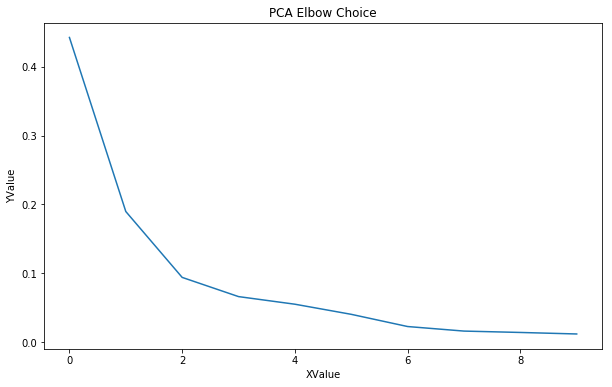

In [130]:
plt.figure(figsize = (10,6))
plt.plot(var)
plt.title("PCA Elbow Choice")
plt.xlabel("XValue")
plt.ylabel("YValue")
#we pick the components at the elbow = 2

In [116]:
# Divide records in training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size=0.3, random_state=2, stratify=y)

# Create an SVM classifier and train it on 70% of the data set.
clf = SVC(probability=True)
clf.fit(X_train, y_train)

#Analyze accuracy of predictions on 30% of the holdout test sample.
classifier_score = clf.score(X_test, y_test)
print ('\nThe classifier accuracy score is {:03.2f}\n'.format(classifier_score))


The classifier accuracy score is 0.95



In [122]:
from sklearn.model_selection import cross_val_score
#since we are using many features we can use cross validations to take a component of the features in order to get how the model performs.
n_folds = 3
cv_error = np.average(cross_val_score(SVC(), Xs, y, cv=n_folds))
print ('\nThe {}-fold cross-validation accuracy score for this classifier is {:.2f}\n'.format(n_folds, cv_error))


The 3-fold cross-validation accuracy score for this classifier is 0.97



The value above and beyond tell us we need a minimum of three valuables to predict the resulting diagnosis at the accuracy of 97%

In [124]:
# The confusion matrix helps visualize the performance of the algorithm.
from sklearn.metrics import confusion_matrix
y_pred = clf.fit(X_train, y_train).predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[106   1]
 [  7  57]]


In [127]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred ))

             precision    recall  f1-score   support

          0       0.94      0.99      0.96       107
          1       0.98      0.89      0.93        64

avg / total       0.95      0.95      0.95       171

